In [126]:
import boto3
import io
import re
import numpy as np
import os
import xml.etree.ElementTree as ET 
from google.cloud import vision
import requests
from nltk.corpus import stopwords as stpword
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

In [119]:
def extract_clean_str(original_str):
    return re.sub('[^a-zA-Z0-9]+', ' ', original_str, flags=re.UNICODE).lower().strip().replace(' ', '') 

def extract_clean_list(original_list):
    return list(set([lancasterStem.stem(obj_item.lower()) for item in original_list for obj_item in item.split() if obj_item not in stopwords]))

def get_mapped(path):
    key_map, dict_idx = {}, 0
    for r, _, f in os.walk(dir_path):
        for file in f:
            if '.JPG' in file or '.jpg' in file:
                key_map[dict_idx] = file
                dict_idx += 1
    idxs = list(key_map.keys())          
    shuffled_idxs = np.random.randint(0, len(idxs), len(idxs))
    return key_map, shuffled_idxs

def fetch_from_xml(path, file):
    tree = ET.parse(os.path.join(path, file)).getroot()
    stemmed_words = extract_clean_list([e.attrib['char'] for e in tree.iter(tag='character')])
    return extract_clean_str(''.join(stemmed_words))

In [120]:
annotation_file = 'datasets/image_labeling/annotations/captions_val2017.json'
with open(annotation_file) as json_file:
    caption_file = json.load(json_file)
captions, mapped_annotation = {}, {}

for annotation in caption_file['annotations']:
    mapped_annotation[annotation['image_id']] = annotation['caption']

for image in caption_file['images']:
    captions[image['file_name']] = mapped_annotation.get(image['id'])
del mapped_annotation

In [123]:
captions.get('000000287649.jpg')

'A kitty cat looks up from a desk, near a keyboard.'

In [134]:
dir_path = 'datasets/image_labeling/val2017/'
dict_files, files_idx = get_mapped(dir_path)
shuffled_idx = np.random.randint(0, len(files_idx), len(files_idx))
stopwords = set(stpword.words('english'))
lancasterStem = LancasterStemmer()

file = dict_files.get(shuffled_idx[1])
print (file)

with io.open(os.path.join(dir_path, file), 'rb') as image_file:
    content = (image_file.read())
    
vision_client = vision.ImageAnnotatorClient()
image = vision.types.Image(content=content)
text_detection_response = vision_client.label_detection(image=image)
detected_str = extract_clean_list([label.description for label in text_detection_response.label_annotations])
print (detected_str)

000000290843.jpg
['cat', 'whisk', 'carn', 'felida', 'fur', 'europ', 'shorthair', 'smal', 'ear', 'kit', 'medium-sized', 'tabby']


In [124]:
ground_truth = extract_clean_list(captions.get('000000287649.jpg').split())

In [125]:
ground_truth

['cat', 'a', 'kitty', 'near', 'look', 'keyboard.', 'desk,']

In [110]:
captions.get(file)

'A refrigerator has been doubled as a city map.'

In [114]:
captions.get(file).split()

['A', 'large', 'bear', 'laying', 'down', 'on', 'a', 'leather', 'hammock.']

In [104]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

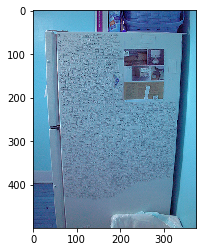

In [106]:
plt.imshow(cv2.imread(os.path.join(dir_path, file)))

In [102]:
captions.get(file)

'A refrigerator has been doubled as a city map.'

In [51]:
# Removing Plural
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
st.stem('wiskies')

'wisky'